PUBG Game Prediction


Table Content-

1.   Importing Libraries
2.   Reading Data
3.   Data Wrangling
4.   Feature Engineering
5.   ML - CatBoost Model











Importing Libraries

In [1]:
# handling warnings
import warnings
warnings.filterwarnings("ignore")

# standard libraries
import numpy as np
import pandas as pd

# visualisation
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (16, 6)

import seaborn as sns


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
!pip install catboost
import catboost as cb
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.0 MB/s eta 0:00:00


Reading the Data

In [3]:
variable_name = "" # @param {"type":"string"}
# load the data
df = pd.read_csv("PUBG_Game_Prediction_data.csv")

In [4]:
df.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0.0,0.0,0.00,0.0,0.0,0.0,60.0,...,0.0,0.0000,0.0,0.00,0.0,0.0,244.80,1.0,1466.0,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0.0,0.0,91.47,0.0,0.0,0.0,57.0,...,0.0,0.0045,0.0,11.04,0.0,0.0,1434.00,5.0,0.0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1.0,0.0,68.00,0.0,0.0,0.0,47.0,...,0.0,0.0000,0.0,0.00,0.0,0.0,161.80,2.0,0.0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0.0,0.0,32.90,0.0,0.0,0.0,75.0,...,0.0,0.0000,0.0,0.00,0.0,0.0,202.70,3.0,0.0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0.0,0.0,100.00,0.0,0.0,0.0,45.0,...,0.0,0.0000,0.0,0.00,0.0,0.0,49.75,2.0,0.0,0.1875


In [5]:
df.shape


(28274, 29)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28274 entries, 0 to 28273
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               28274 non-null  object 
 1   groupId          28274 non-null  object 
 2   matchId          28273 non-null  object 
 3   assists          28273 non-null  float64
 4   boosts           28273 non-null  float64
 5   damageDealt      28273 non-null  float64
 6   DBNOs            28273 non-null  float64
 7   headshotKills    28273 non-null  float64
 8   heals            28273 non-null  float64
 9   killPlace        28273 non-null  float64
 10  killPoints       28273 non-null  float64
 11  kills            28273 non-null  float64
 12  killStreaks      28273 non-null  float64
 13  longestKill      28273 non-null  float64
 14  matchDuration    28273 non-null  float64
 15  matchType        28273 non-null  object 
 16  maxPlace         28273 non-null  float64
 17  numGroups   

Data Wrangling

In [7]:
# check row with NULL win prediction value
df[df['winPlacePerc'].isnull()]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
28273,ae3dce81e6934b,b2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# remove the data row
df.drop(28273, inplace = True)
# df = df.drop(1117026)

In [11]:
# prepare new parameter to know how many players are in a game
df['playersJoined'] = df.groupby('matchId')['matchId'].transform('count')

In [12]:
df.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,playersJoined
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0.0,0.0,0.00,0.0,0.0,0.0,60.0,...,0.0000,0.0,0.00,0.0,0.0,244.80,1.0,1466.0,0.4444,2
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0.0,0.0,91.47,0.0,0.0,0.0,57.0,...,0.0045,0.0,11.04,0.0,0.0,1434.00,5.0,0.0,0.6400,2
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1.0,0.0,68.00,0.0,0.0,0.0,47.0,...,0.0000,0.0,0.00,0.0,0.0,161.80,2.0,0.0,0.7755,1
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0.0,0.0,32.90,0.0,0.0,0.0,75.0,...,0.0000,0.0,0.00,0.0,0.0,202.70,3.0,0.0,0.1667,4
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0.0,0.0,100.00,0.0,0.0,0.0,45.0,...,0.0000,0.0,0.00,0.0,0.0,49.75,2.0,0.0,0.1875,1


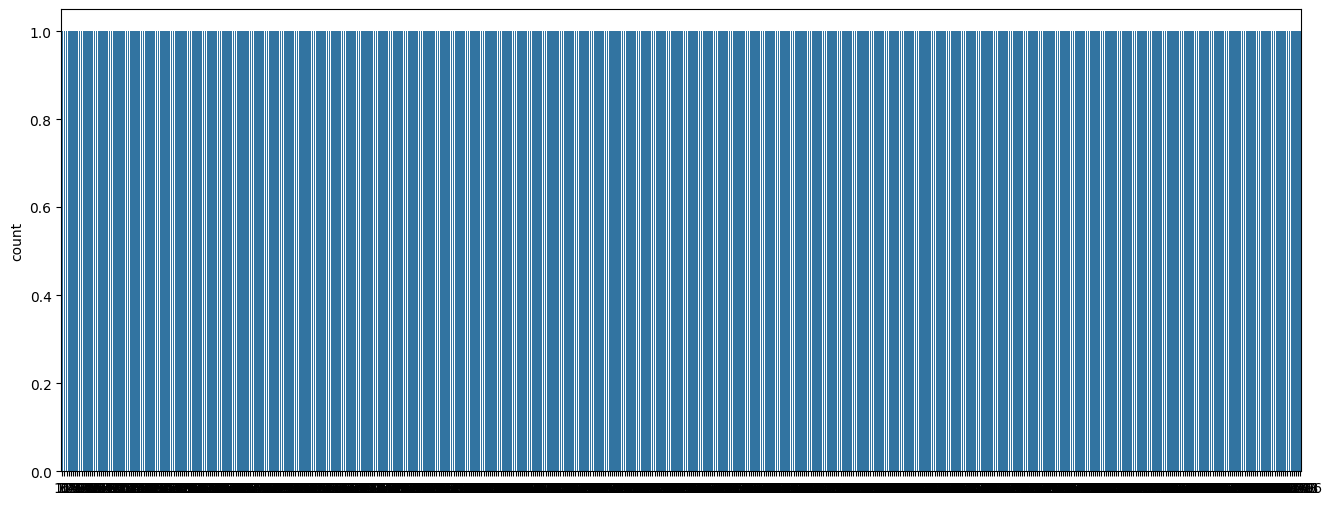

In [13]:
sns.countplot(df[df['playersJoined']>=4]['playersJoined'])
plt.show()

Analysing the data

In [14]:
# prepare a data parameter to gather the information of the total distance travelled
df['totalDistance'] = df['rideDistance'] + df['walkDistance'] + df['swimDistance']

# prepare a data parameter to check for anamoly detection that
# the person has not moved but still managed to do the kills
df['killswithoutMoving'] = ((df['kills']>0) & (df['totalDistance'] ==0))

In [15]:
df[df['killswithoutMoving'] == True].head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,playersJoined,totalDistance,killswithoutMoving
1824,b538d514ef2476,0eb2ce2f43f9d6,35e7d750e442e2,0.0,0.0,593.0,0.0,0.0,3.0,18.0,...,0.0,0.0,0.0,0.0,8.0,0.0,0.8571,1,0.0,True
6673,6d3a61da07b7cb,2d8119b1544f87,904cecf36217df,2.0,0.0,346.6,0.0,0.0,6.0,33.0,...,0.0,0.0,0.0,0.0,22.0,0.0,0.6000,2,0.0,True
11892,550398a8f33db7,c3fd0e2abab0af,db6f6d1f0d4904,2.0,0.0,1750.0,0.0,4.0,5.0,3.0,...,0.0,0.0,0.0,0.0,13.0,0.0,0.8947,1,0.0,True
14631,58d690ee461e9d,ea5b6630b33d67,dbf34301df5e53,0.0,0.0,157.8,0.0,0.0,0.0,69.0,...,0.0,0.0,0.0,0.0,7.0,1500.0,0.0000,1,0.0,True
15591,49b61fc963d632,0f5c5f19d9cc21,904cecf36217df,0.0,0.0,100.0,0.0,1.0,0.0,37.0,...,0.0,0.0,0.0,0.0,10.0,0.0,0.3000,2,0.0,True


In [16]:
df[df['killswithoutMoving'] == True].shape

(9, 32)

In [17]:
# drop the table
df.drop(df[df['killswithoutMoving'] == True].index , inplace = True)

In [18]:
df[df['roadKills'] > 5].shape

(0, 32)

In [19]:
df.drop(df[df['roadKills'] > 5].index, inplace = True)

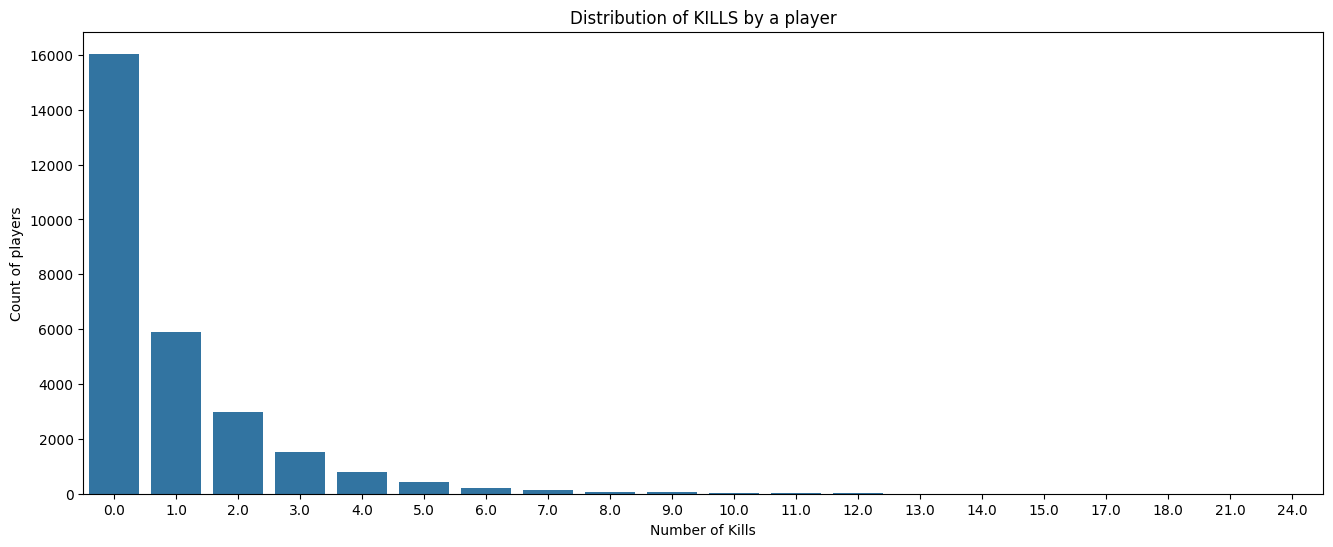

In [20]:
sns.countplot(data = df, x = df['kills']).set_title("Distribution of KILLS by a player")
plt.ylabel("Count of players")
plt.xlabel("Number of Kills")
plt.show()

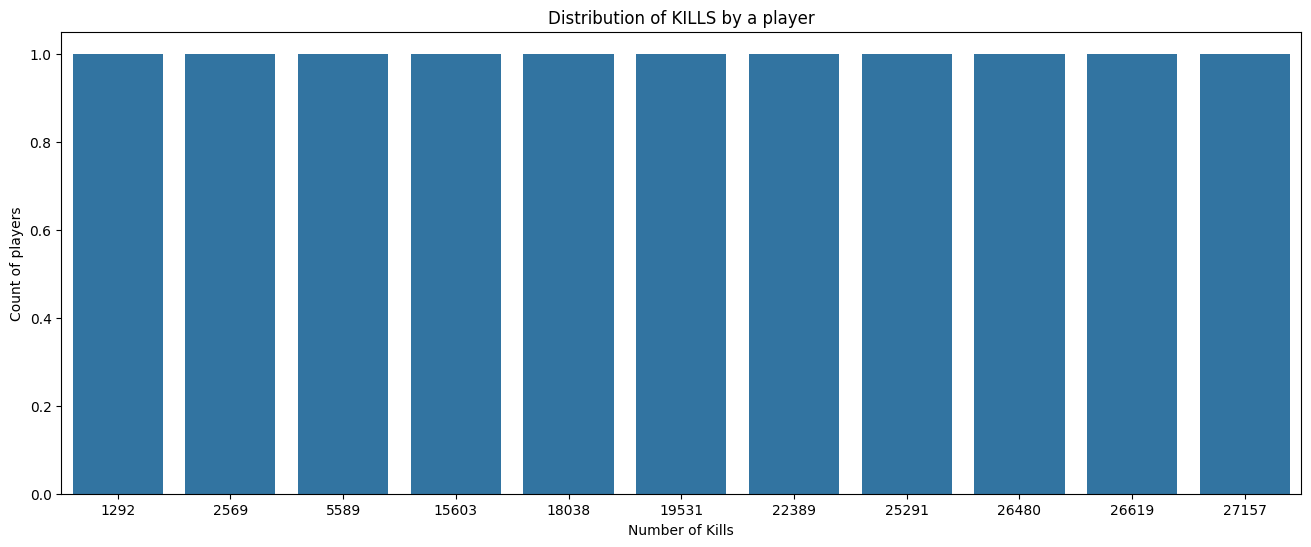

In [21]:
sns.countplot(df[df['kills']>=15]['kills']).set_title("Distribution of KILLS by a player")
plt.ylabel("Count of players")
plt.xlabel("Number of Kills")
plt.show()

In [22]:
# data dimension
df[df['kills'] > 20].shape

(2, 32)

In [23]:
# drop the instances
df.drop(df[df['kills'] > 20].index, inplace = True)

In [24]:
df['headshot_rate'] = df['headshotKills']/df['kills']
df['headshot_rate'] = df['headshot_rate'].fillna(0)

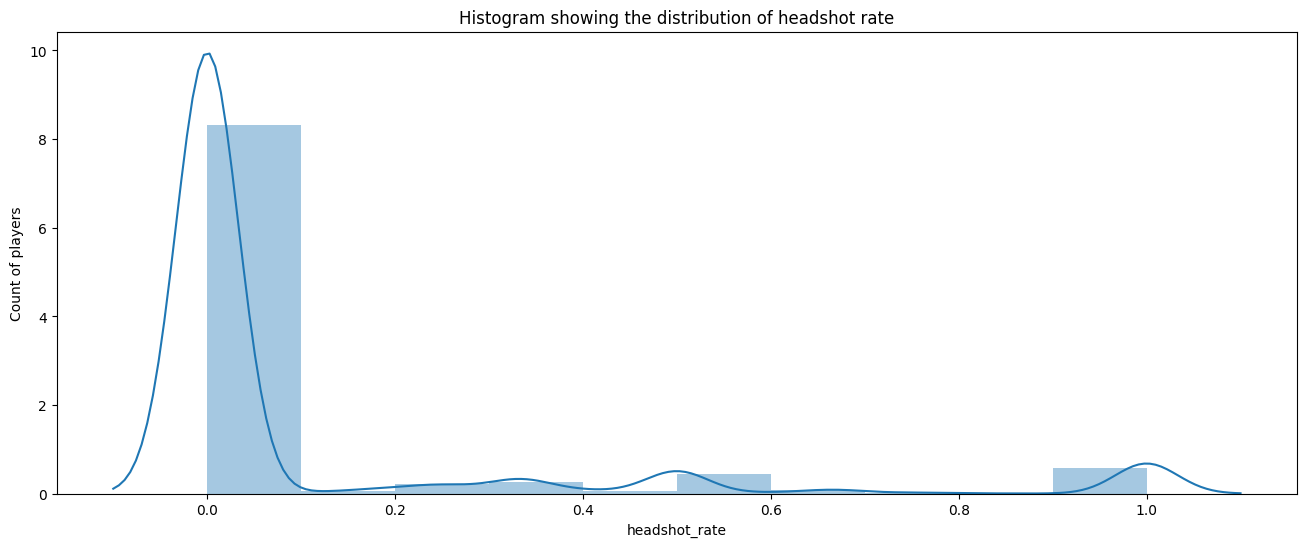

In [25]:
# plot the headshot rate distribution
sns.distplot(df['headshot_rate'], bins =10).set_title("Histogram showing the distribution of headshot rate")
plt.ylabel("Count of players")
plt.show()

In [26]:
df[(df['headshot_rate'] ==1) & (df['kills']>5)].shape

(0, 33)

In [27]:
df.drop(df[(df['headshot_rate'] == 1)& (df['kills'] > 6)].index, inplace = True)

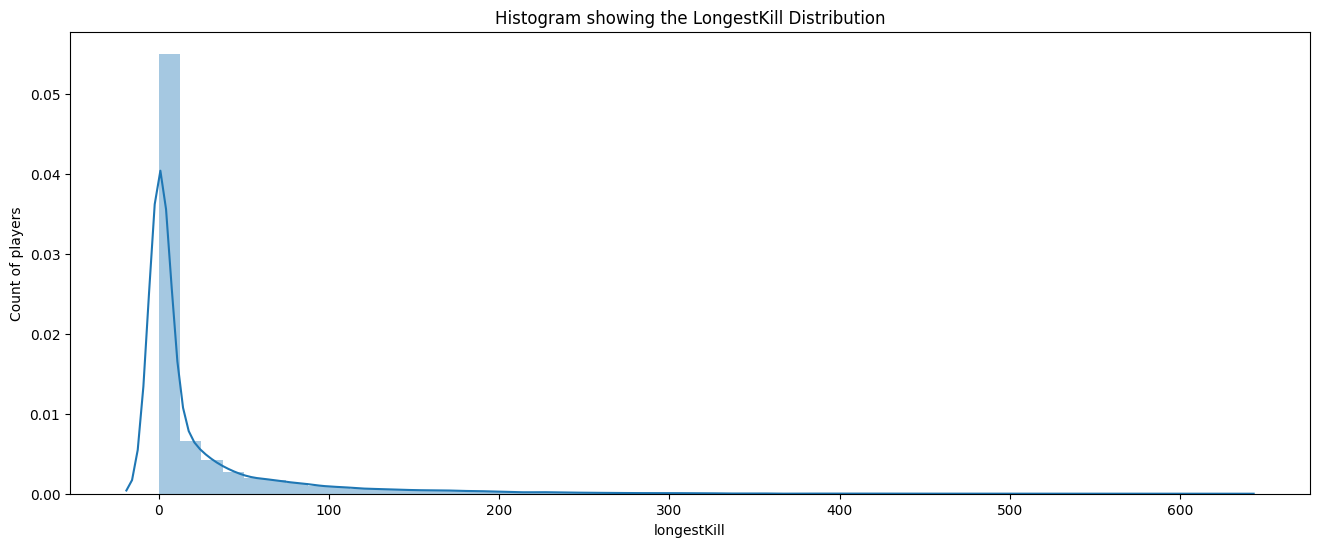

In [28]:
sns.distplot(df['longestKill'], bins = 50).set_title("Histogram showing the LongestKill Distribution")
plt.ylabel("Count of players")
plt.show()

In [29]:
df[df['longestKill']>=500].shape

(2, 33)

In [30]:
df.drop(df[df['longestKill']>=20].index, inplace = True)

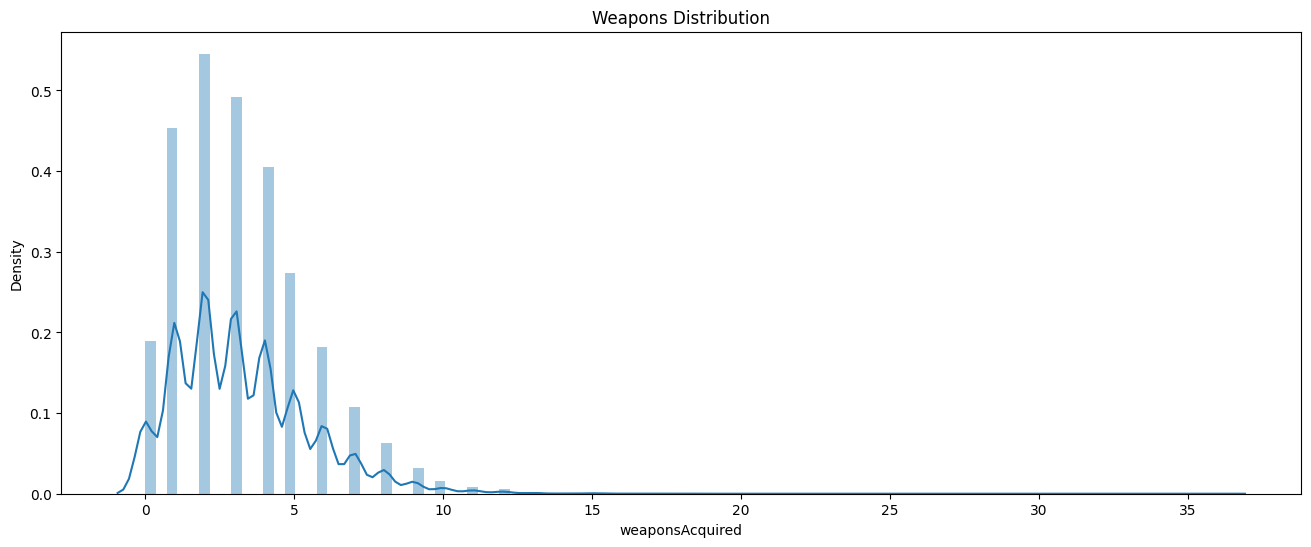

In [31]:
sns.distplot(df['weaponsAcquired'], bins=100).set_title("Weapons Distribution")
plt.show()

In [32]:
df[df['weaponsAcquired']>=15].shape

(19, 33)

In [33]:
df.drop(df[df['weaponsAcquired']>=15].index, inplace = True)

In [34]:
df.shape

(20896, 33)

EDA

In [35]:
df.isna().sum()

,0
Id,0
groupId,0
matchId,0
assists,0
boosts,0
damageDealt,0
DBNOs,0
headshotKills,0
heals,0
killPlace,0


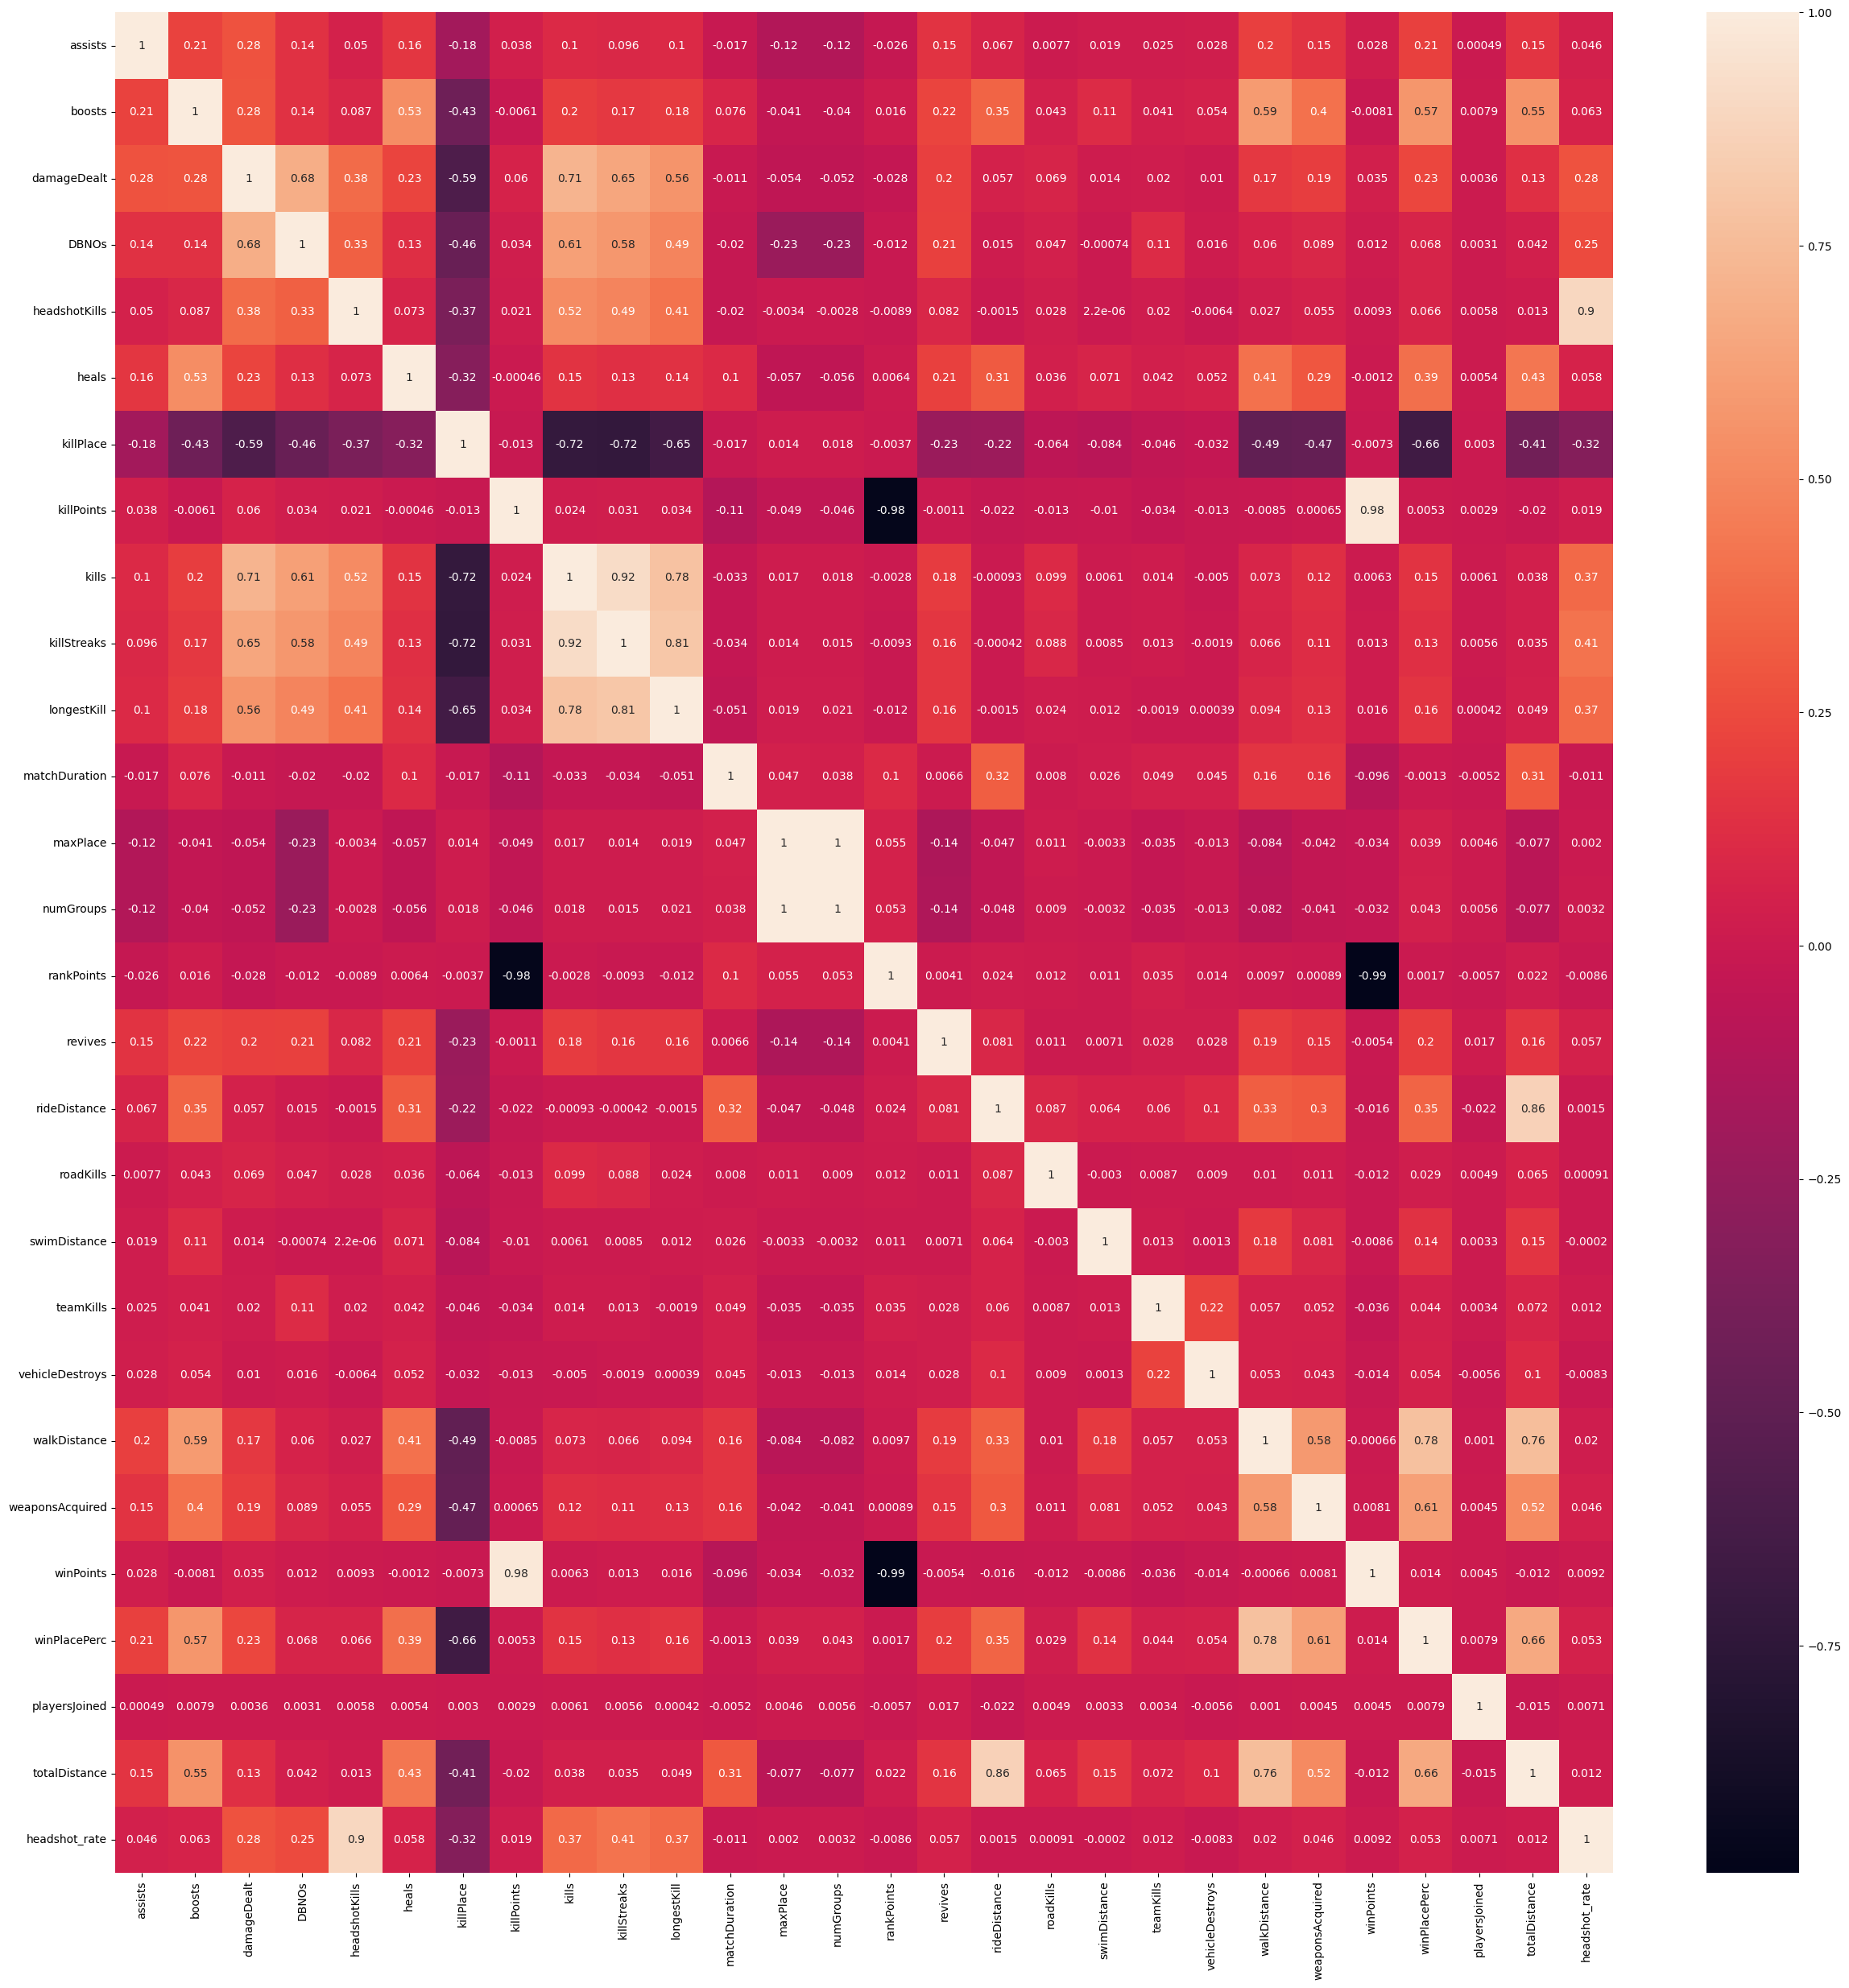

In [36]:
# correlation of parameter with Win Prediction
plt.figure(figsize=[30,30])
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot = True) # Select only numeric columns for correlation
plt.show()

Feature Engineering

In [37]:
normalising_factor = (100 - df['playersJoined']/100)+1

In [38]:
df['killsNorm'] = df['kills'] * normalising_factor
df['damageDealtNorm'] = df['damageDealt'] * normalising_factor
df['maxPlaceNorm'] = df['maxPlace'] * normalising_factor
df['matchDurationNorm'] = df['matchDuration'] * normalising_factor


df['traveldistance'] = df['walkDistance'] + df['swimDistance'] + df['rideDistance']
df['healsnboosts'] = df['heals'] + df['boosts']
df['assist'] = df['assists'] + df['revives']

In [39]:
df.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc', 'playersJoined',
       'totalDistance', 'killswithoutMoving', 'headshot_rate', 'killsNorm',
       'damageDealtNorm', 'maxPlaceNorm', 'matchDurationNorm',
       'traveldistance', 'healsnboosts', 'assist'],
      dtype='object')

ML - Catboost Model


Handling categorical data

In [40]:
data = df.drop(columns = ['Id', 'groupId', 'matchId', 'assists', 'boosts', 'walkDistance', 'swimDistance',
                          'rideDistance', 'heals', 'revives', 'kills', 'damageDealt', 'maxPlace', 'matchDuration'])

In [41]:
data.head()

,DBNOs,headshotKills,killPlace,killPoints,killStreaks,longestKill,matchType,numGroups,rankPoints,roadKills,...,totalDistance,killswithoutMoving,headshot_rate,killsNorm,damageDealtNorm,maxPlaceNorm,matchDurationNorm,traveldistance,healsnboosts,assist
0,0.0,0.0,60.0,1241.0,0.0,0.00,squad-fpp,26.0,-1.0,0.0,...,244.8000,False,0.0,0.00,0.0000,2827.44,131879.88,244.8000,0.0,0.0
1,0.0,0.0,57.0,0.0,0.0,0.00,squad-fpp,25.0,1484.0,0.0,...,1445.0445,False,0.0,0.00,9236.6406,2625.48,179441.46,1445.0445,0.0,0.0
2,0.0,0.0,47.0,0.0,0.0,0.00,duo,47.0,1491.0,0.0,...,161.8000,False,0.0,0.00,6867.3200,5049.50,133104.82,161.8000,0.0,1.0
3,0.0,0.0,75.0,0.0,0.0,0.00,squad-fpp,30.0,1408.0,0.0,...,202.7000,False,0.0,0.00,3321.5840,3129.76,144978.56,202.7000,0.0,0.0
5,1.0,1.0,44.0,0.0,1.0,18.44,squad-fpp,28.0,1418.0,0.0,...,34.7000,False,1.0,100.99,10099.0000,2827.72,140881.05,34.7000,0.0,0.0


In [42]:
x = data.drop(['winPlacePerc'], axis = 1)
y = data['winPlacePerc']

In [43]:
x = pd.get_dummies(x, columns = ['matchType', 'killswithoutMoving'])

In [44]:
x.head()

,DBNOs,headshotKills,killPlace,killPoints,killStreaks,longestKill,numGroups,rankPoints,roadKills,teamKills,...,matchType_flarefpp,matchType_flaretpp,matchType_normal-duo-fpp,matchType_normal-solo-fpp,matchType_normal-squad-fpp,matchType_solo,matchType_solo-fpp,matchType_squad,matchType_squad-fpp,killswithoutMoving_False
0,0.0,0.0,60.0,1241.0,0.0,0.00,26.0,-1.0,0.0,0.0,...,False,False,False,False,False,False,False,False,True,True
1,0.0,0.0,57.0,0.0,0.0,0.00,25.0,1484.0,0.0,0.0,...,False,False,False,False,False,False,False,False,True,True
2,0.0,0.0,47.0,0.0,0.0,0.00,47.0,1491.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,True
3,0.0,0.0,75.0,0.0,0.0,0.00,30.0,1408.0,0.0,0.0,...,False,False,False,False,False,False,False,False,True,True
5,1.0,1.0,44.0,0.0,1.0,18.44,28.0,1418.0,0.0,0.0,...,False,False,False,False,False,False,False,False,True,True


In [45]:
x.shape

(20896, 37)

In [46]:
features = x.columns

In [47]:
sc = StandardScaler()
sc.fit(x)
x = pd.DataFrame(sc.transform(x))

In [48]:
x.head()

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
0,-0.502828,-0.248891,0.073953,1.198423,-0.510351,-0.461761,-0.731059,-1.195709,-0.037078,-0.138901,...,-0.015471,-0.021881,-0.031717,-0.016948,-0.04748,-0.20918,-0.370151,-0.409831,1.245054,0.0
1,-0.502828,-0.248891,-0.057991,-0.816591,-0.510351,-0.461761,-0.774020,0.823447,-0.037078,-0.138901,...,-0.015471,-0.021881,-0.031717,-0.016948,-0.04748,-0.20918,-0.370151,-0.409831,1.245054,0.0
2,-0.502828,-0.248891,-0.497805,-0.816591,-0.510351,-0.461761,0.171117,0.832965,-0.037078,-0.138901,...,-0.015471,-0.021881,-0.031717,-0.016948,-0.04748,-0.20918,-0.370151,-0.409831,-0.803178,0.0
3,-0.502828,-0.248891,0.733675,-0.816591,-0.510351,-0.461761,-0.559216,0.720110,-0.037078,-0.138901,...,-0.015471,-0.021881,-0.031717,-0.016948,-0.04748,-0.20918,-0.370151,-0.409831,1.245054,0.0
4,1.035546,3.350295,-0.629749,-0.816591,1.395009,3.429823,-0.645138,0.733707,-0.037078,-0.138901,...,-0.015471,-0.021881,-0.031717,-0.016948,-0.04748,-0.20918,-0.370151,-0.409831,1.245054,0.0


Splitting data

In [49]:
xtrain, xtest, ytrain, ytest= train_test_split(x, y, test_size = 0.3, random_state = 0)

In [50]:
print(xtrain.shape, ytrain.shape)
print(xtest.shape, ytest.shape)

(14627, 37) (14627,)
(6269, 37) (6269,)


CatBoost Model

In [51]:
import catboost as cb

In [52]:
train_dataset = cb.Pool(xtrain, ytrain)
test_dataset = cb.Pool(xtest, ytest)

In [53]:
model = cb.CatBoostRegressor(loss_function='RMSE')

In [54]:
# GRID Search

grid = {'iterations': [100, 150],
       'learning_rate': [0.03, 0.1],
       'depth': [2, 4, 6, 8]}

model.grid_search(grid, train_dataset)

0:	learn: 0.4757004	test: 0.4676890	best: 0.4676890 (0)	total: 50ms	remaining: 4.95s
1:	learn: 0.4636882	test: 0.4557756	best: 0.4557756 (1)	total: 53.9ms	remaining: 2.64s
2:	learn: 0.4514974	test: 0.4437040	best: 0.4437040 (2)	total: 56.8ms	remaining: 1.83s
3:	learn: 0.4397702	test: 0.4320947	best: 0.4320947 (3)	total: 59.7ms	remaining: 1.43s
4:	learn: 0.4284155	test: 0.4209275	best: 0.4209275 (4)	total: 62ms	remaining: 1.18s
5:	learn: 0.4174751	test: 0.4101195	best: 0.4101195 (5)	total: 64.3ms	remaining: 1.01s
6:	learn: 0.4069132	test: 0.3996692	best: 0.3996692 (6)	total: 66.7ms	remaining: 886ms
7:	learn: 0.3965999	test: 0.3894795	best: 0.3894795 (7)	total: 68.8ms	remaining: 791ms
8:	learn: 0.3867272	test: 0.3796879	best: 0.3796879 (8)	total: 70.9ms	remaining: 716ms
9:	learn: 0.3770610	test: 0.3701300	best: 0.3701300 (9)	total: 73.1ms	remaining: 658ms
10:	learn: 0.3682709	test: 0.3614080	best: 0.3614080 (10)	total: 75.2ms	remaining: 608ms
11:	learn: 0.3592641	test: 0.3525528	best: 0.

{'params': {'depth': 8, 'learning_rate': 0.1, 'iterations': 150},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               45,
               46,
    

In [55]:
feature_importance_df = pd.DataFrame()
feature_importance_df['features'] = features
feature_importance_df['importance'] = model.feature_importances_

feature_importance_df = feature_importance_df.sort_values(by = ['importance'], ascending=False)

In [56]:
feature_importance_df

,features,importance
2,killPlace,47.156347
20,traveldistance,13.809150
4,killStreaks,7.271684
14,totalDistance,5.748665
19,matchDurationNorm,4.402634
5,longestKill,3.891834
16,killsNorm,3.744799
6,numGroups,3.727366
18,maxPlaceNorm,2.868777
21,healsnboosts,2.259593


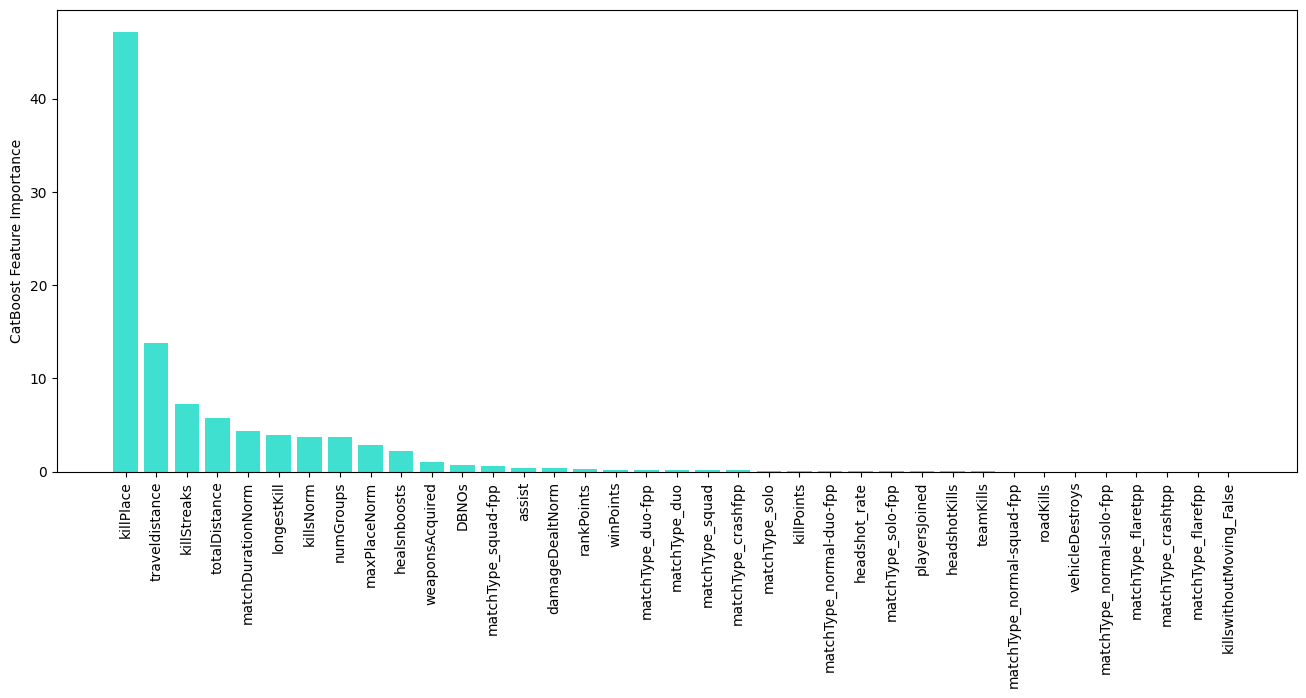

In [57]:
plt.bar(feature_importance_df.features, feature_importance_df.importance, color='turquoise')
plt.ylabel("CatBoost Feature Importance")
plt.xticks(rotation = 90)
plt.show()

Prediction

In [58]:
pred = model.predict(xtest)

In [59]:
rmse = np.sqrt(mean_squared_error(ytest, pred))
r2 = r2_score(ytest, pred)

print("Testing performance")

print("RMSE: {:.2f}".format(rmse))
print("R2: {:.2f}".format(r2))

Testing performance
RMSE: 0.08
R2: 0.92
